Name : Adetayo Mathew Temitope

Project Supervisor :Dr Ks Ojo

Topic : Predicting  Memristive Chaotic System

Matric NO : 190808064

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
a = 1
b = 2
c = 2


In [3]:
def memristive_system(t, state):
    x, y, z, u = state
    W = b * np.abs(u) - c
    dxdt = y + y * np.tan(z)
    dydt = -np.tan(z)
    dzdt = x * W - a * np.tan(z)
    dudt = x
    return [dxdt, dydt, dzdt, dudt]


In [4]:
initial_state = [0, 1, 0, 0]


In [5]:
t_span = (0, 1000)
t_eval = np.linspace(*t_span, 100000)


In [6]:
#This numerically integrates the system using Runge-Kutta 4(5) method (RK45), returning time and solutions.
solution = solve_ivp(memristive_system, t_span, initial_state, t_eval=t_eval, method='RK45')


In [7]:
t = solution.t
x, y, z, u = solution.y
data = np.vstack((x, y, z, u)).T

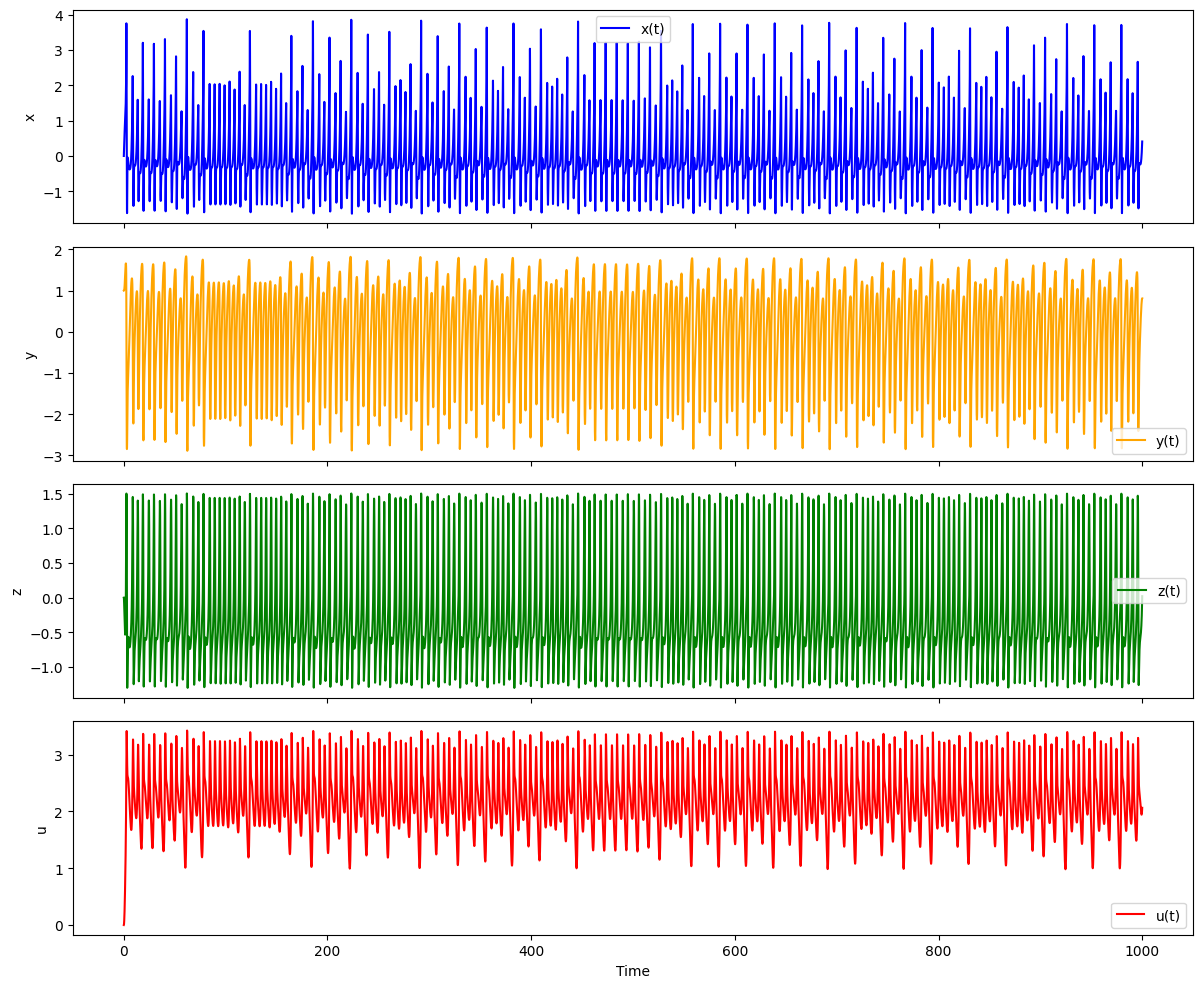

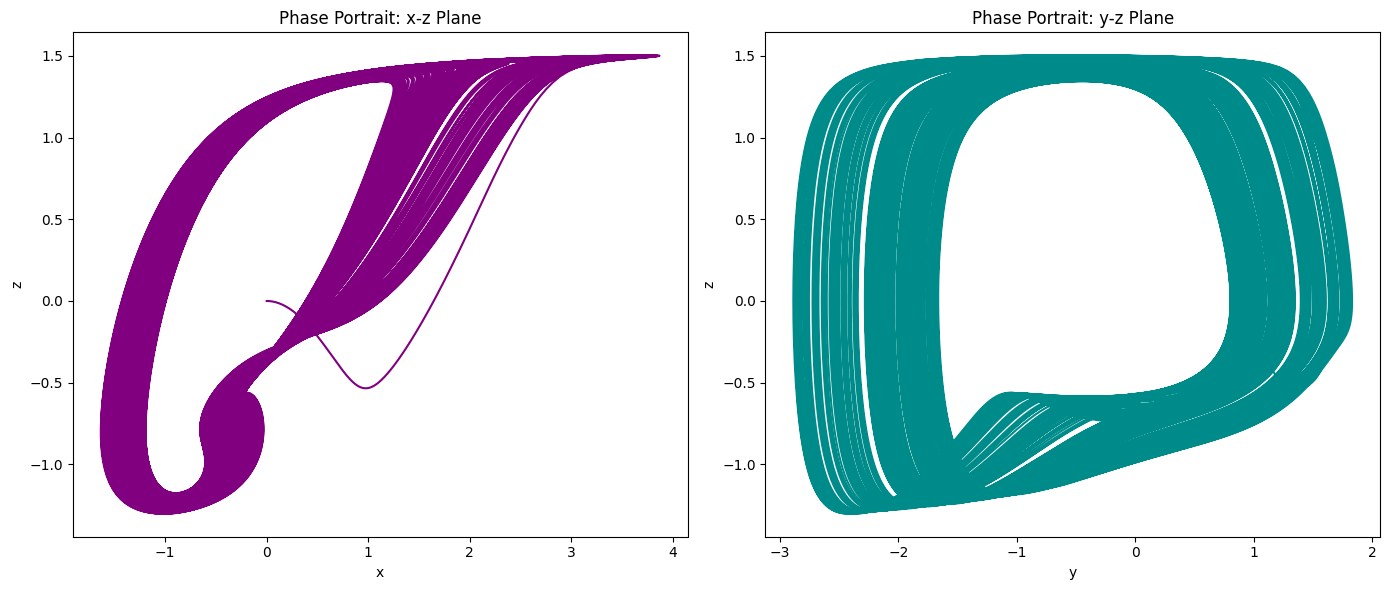

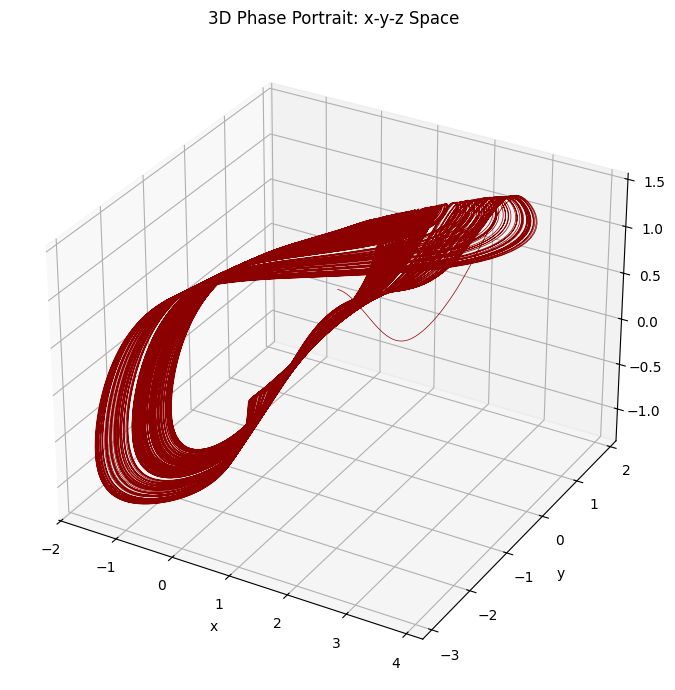

In [8]:
# Plot time series
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
axs[0].plot(t, x, label='x(t)', color='blue')
axs[0].set_ylabel('x')
axs[0].legend()

axs[1].plot(t, y, label='y(t)', color='orange')
axs[1].set_ylabel('y')
axs[1].legend()

axs[2].plot(t, z, label='z(t)', color='green')
axs[2].set_ylabel('z')
axs[2].legend()

axs[3].plot(t, u, label='u(t)', color='red')
axs[3].set_ylabel('u')
axs[3].set_xlabel('Time')
axs[3].legend()

plt.tight_layout()
plt.show()

# 2D phase portraits (Figure 2)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
axs[0].plot(x, z, color='purple')
axs[0].set_xlabel('x')
axs[0].set_ylabel('z')
axs[0].set_title('Phase Portrait: x-z Plane')

axs[1].plot(y, z, color='darkcyan')
axs[1].set_xlabel('y')
axs[1].set_ylabel('z')
axs[1].set_title('Phase Portrait: y-z Plane')

plt.tight_layout()
plt.show()

# 3D phase portrait (Figure 4)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, lw=0.5, color='darkred')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D Phase Portrait: x-y-z Space')

plt.tight_layout()
plt.show()

In [9]:
input_dim = 4


In [10]:
!pip install reservoirpy
from sklearn.linear_model import Ridge


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 kB 9.2 MB/s eta 0:00:00


In [11]:
# Adjusted setup: train and test from the beginning
reservoir_sizes = np.linspace(300, 20, 20, dtype=int)
spectral_radius = 1.25
leak_rate = 0.3
ridge_alpha = 1e-6

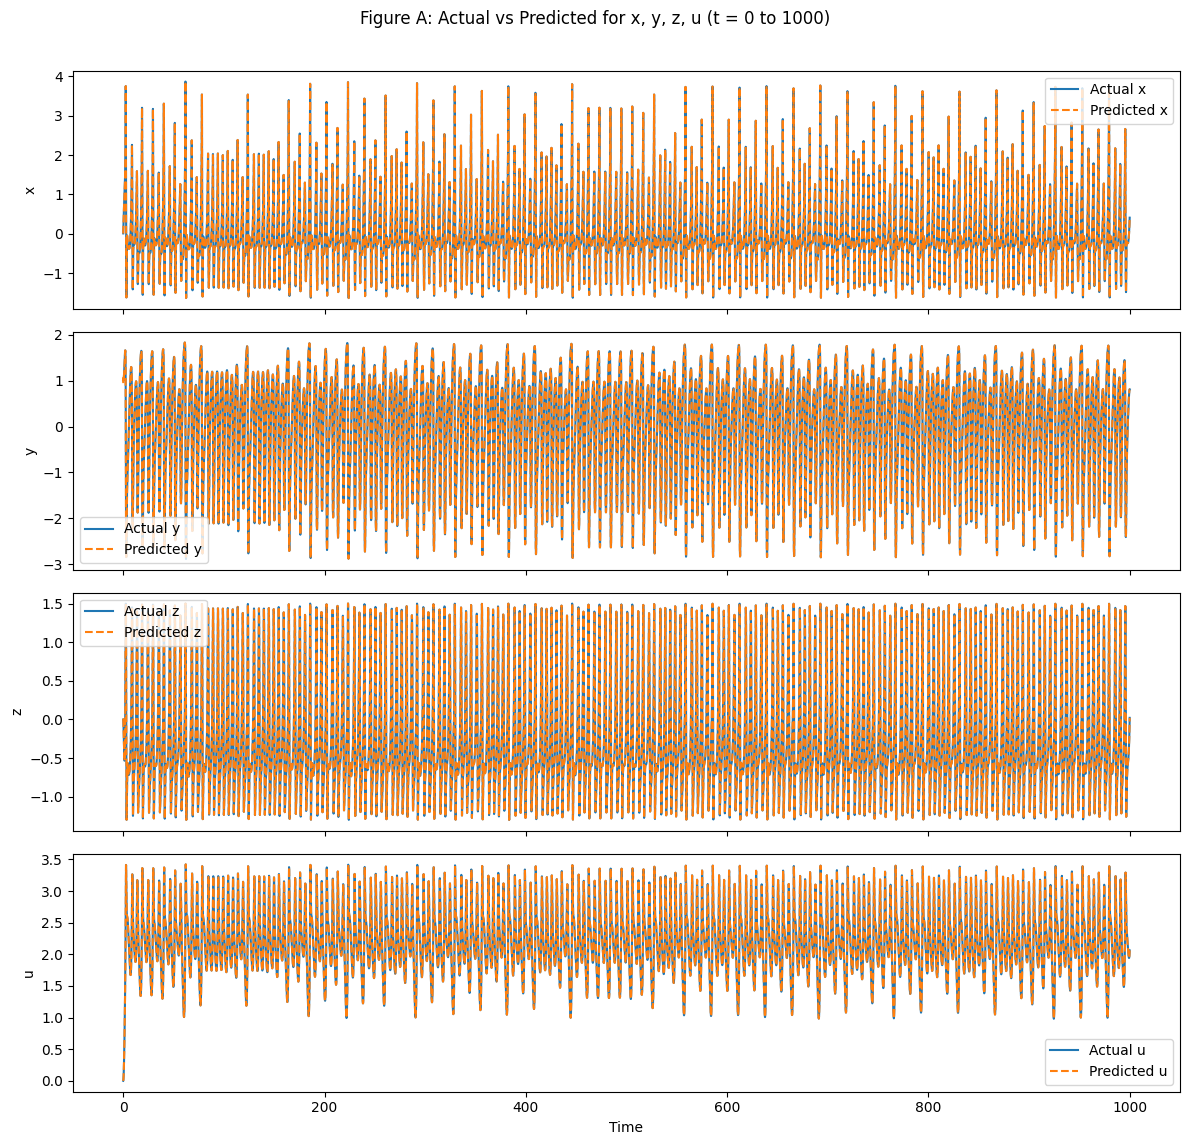

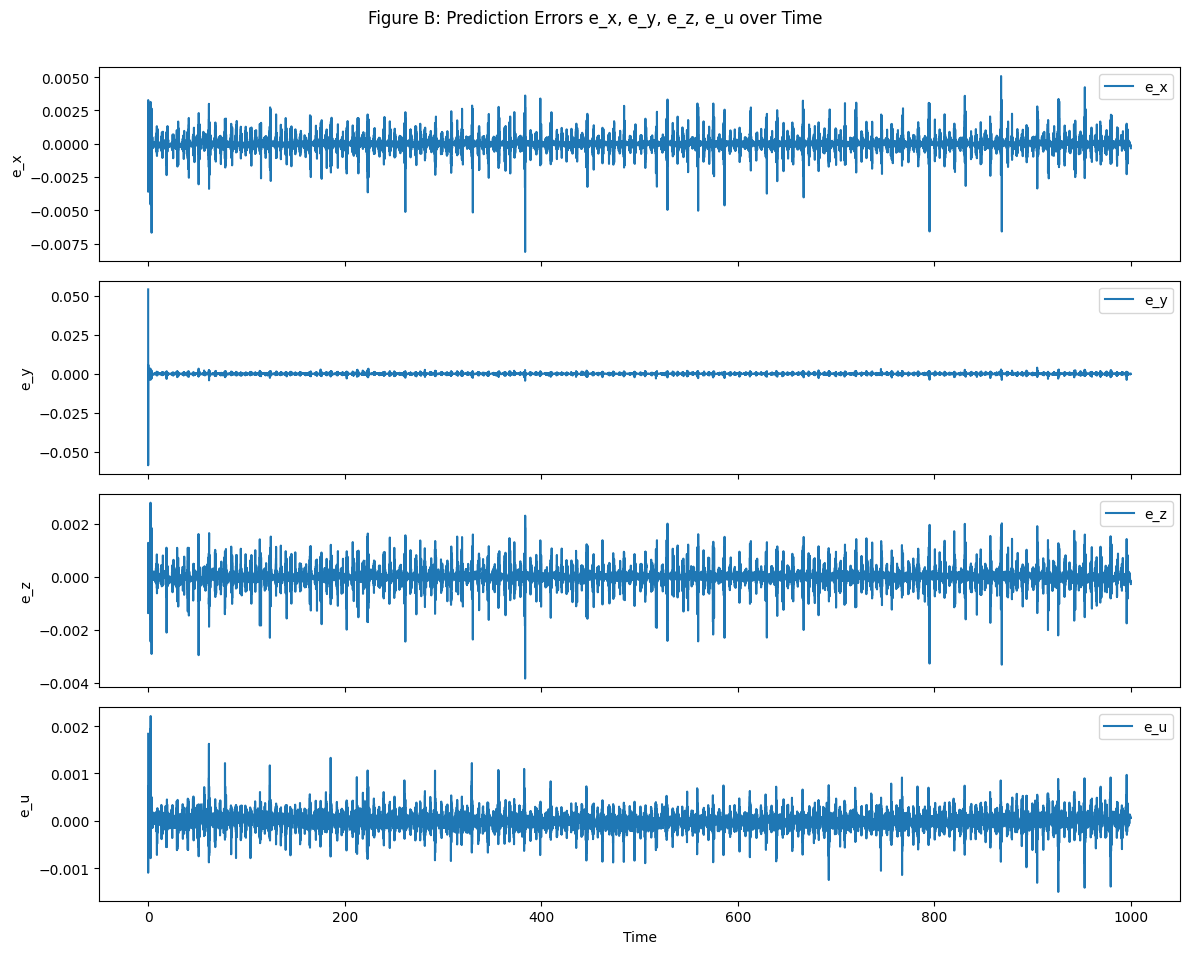

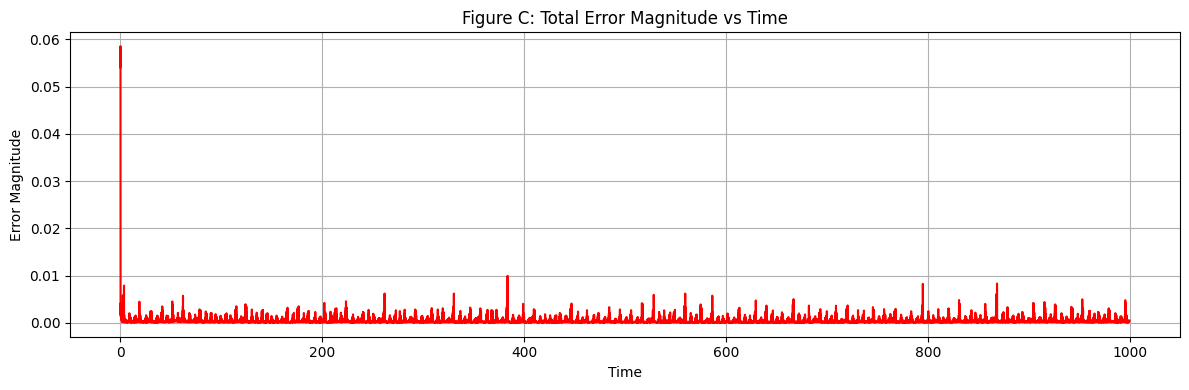

In [13]:
reservoir_size = reservoir_sizes[0] # Using the first reservoir size from the defined array
np.random.seed(42)
Win = (np.random.rand(reservoir_size, input_dim) - 0.5) * 2
W = np.random.rand(reservoir_size, reservoir_size) - 0.5
radius = max(abs(np.linalg.eigvals(W)))
W *= spectral_radius / radius

# Reservoir function
def reservoir_layer(inputs):
    state = np.zeros(reservoir_size)
    states = []
    for u in inputs:
        pre_activation = np.dot(Win, u) + np.dot(W, state)
        state = (1 - leak_rate) * state + leak_rate * np.tanh(pre_activation)
        states.append(state.copy())
    return np.array(states)

# Train on full series (except last for offset)
train_input = data[:-1]
train_output = data[1:]
t_test = t[1:]

reservoir_states = reservoir_layer(train_input)
ridge = Ridge(alpha=ridge_alpha, fit_intercept=False)
ridge.fit(reservoir_states, train_output)
predicted_output = ridge.predict(reservoir_states)

# Compute errors
errors = train_output - predicted_output
e_x, e_y, e_z, e_u = errors.T
error_magnitude = np.sqrt(e_x**2 + e_y**2 + e_z**2 + e_u**2)

# Plot actual vs predicted
fig, axs = plt.subplots(4, 1, figsize=(12, 12), sharex=True)
labels = ['x', 'y', 'z', 'u']
for i, ax in enumerate(axs):
    ax.plot(t_test, train_output[:, i], label=f'Actual {labels[i]}')
    ax.plot(t_test, predicted_output[:, i], '--', label=f'Predicted {labels[i]}')
    ax.set_ylabel(labels[i])
    ax.legend()
axs[-1].set_xlabel('Time')
plt.suptitle("Figure A: Actual vs Predicted for x, y, z, u (t = 0 to 1000)")
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

# Plot individual errors
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
for i, (err, label) in enumerate(zip([e_x, e_y, e_z, e_u], labels)):
    axs[i].plot(t_test, err, label=f'e_{label}')
    axs[i].set_ylabel(f'e_{label}')
    axs[i].legend()
axs[-1].set_xlabel("Time")
plt.suptitle("Figure B: Prediction Errors e_x, e_y, e_z, e_u over Time")
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

# Plot error magnitude
plt.figure(figsize=(12, 4))
plt.plot(t_test, error_magnitude, color='red')
plt.title("Figure C: Total Error Magnitude vs Time")
plt.xlabel("Time")
plt.ylabel("Error Magnitude")
plt.grid(True)
plt.tight_layout()
plt.show()